<a href="https://colab.research.google.com/github/Deepak-Mewada/NeuralDecoder/blob/main/BrainDecoder/Basics/Basic_brain_decoding_on_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install braindecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.2/165.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install MOABB

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.8/563.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 19.7 MB/s eta 0:00:00
  Created wheel for pyriemann: filename=pyriemann-0.5-py2.py3-none-any.whl size=107752 sha256=39bbf5ffb000b4a9ae07776e525a56a5c6032684d1138412660977d2f9a61778
  Stored in directory: /root/.cache/pip/wheels/84/86/79/622e9c1dc933dc088e287ebfaac5aa9bdc6a38a9db193ce1f1
Successfully built pyriemann
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninsta

In [ ]:
from braindecode.datasets import MOABBDataset

subject_id = 3
dataset = MOABBDataset(dataset_name = "BNCI2014_001", subject_ids = [subject_id])

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
/usr/local/lib/python3.10/dist-packages/moabb/pipelines/__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(
/usr/local/lib/python3.10/dist-packages/moabb/datasets/download.py:55: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_P

MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|█████████████████████████████████████| 44.1M/44.1M [00:00<00:00, 4.26GB/s]
SHA256 hash of downloaded file: 7e731ee8b681d5da6ecb11ae1d4e64b1653c7f15aad5d6b7620b25ce53141e80
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|█████████████████████████████████████| 42.3M/42.3M [

In [ ]:
from numpy import multiply
from braindecode.preprocessing import(Preprocessor, exponential_moving_standardize, preprocess)

low_cut_hz = 4
high_cut_hz = 38
factor_new = 1e-3
init_block_size = 1000
factor = 1e6

preprocessors =[
    Preprocessor('pick_types', eeg = True, meg = False, stim = False),
    Preprocessor(lambda data: multiply(data, factor)),
    Preprocessor('filter', l_freq = low_cut_hz, h_freq = high_cut_hz),
    Preprocessor(exponential_moving_standardize, factor_new = factor_new,
                 init_block_size = init_block_size)
]

preprocess(dataset, preprocessors, n_jobs = -1)

/usr/local/lib/python3.10/dist-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')


In [ ]:
from braindecode.preprocessing import create_windows_from_events

trial_start_offset_seconds = -0.5

sfreq = dataset.datasets[0].raw.info['sfreq']
assert all([ds.raw.info['sfreq'] == sfreq for ds in dataset.datasets])
trial_start_offset_samples = int(trial_start_offset_seconds *  sfreq)
windows_dataset = create_windows_from_events(
    dataset,
    trial_start_offset_samples = trial_start_offset_samples,
    trial_stop_offset_samples = 0,
    preload = True
)

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


In [ ]:
splitted = windows_dataset.split('session')
train_set = splitted['0train']
valid_set = splitted['1test']

In [ ]:
print(windows_dataset)

In [ ]:
import torch

from braindecode.models import ShallowFBCSPNet
from braindecode.util import set_random_seeds

cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
if cuda:
  torch.backends.cudnn.benchmark = True

seed = 20200220
set_random_seeds(seed = seed, cuda = cuda)

n_classes = 4
classes = list(range(n_classes))
n_chans = train_set[0][0].shape[0]
input_window_samples = train_set[0][0].shape[1]

model = ShallowFBCSPNet(
    n_chans,
    n_classes,
    input_window_samples = input_window_samples,
    final_conv_length = 'auto'
)

print(model)

if cuda:
  model = model.cuda()


Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
ShallowFBCSPNet (ShallowFBCSPNet)        [1, 22, 1125]             [1, 4]                    --                        --
├─Ensure4d (ensuredims): 1-1             [1, 22, 1125]             [1, 22, 1125, 1]          --                        --
├─Rearrange (dimshuffle): 1-2            [1, 22, 1125, 1]          [1, 1, 1125, 22]          --                        --
├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1125, 22]          [1, 40, 1101, 1]          36,240                    --
├─BatchNorm2d (bnorm): 1-4               [1, 40, 1101, 1]          [1, 40, 1101, 1]          80                        --
├─Expression (conv_nonlin_exp): 1-5      [1, 40, 1101, 1]          [1, 40, 1101, 1]          --                        --
├─AvgPool2d (pool): 1-6                  [1, 40, 1101, 1]          [1, 40, 69, 1]            --                        [75, 1]
├─Express

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


In [ ]:
from skorch.callbacks import LRScheduler
from skorch.helper import predefined_split

from braindecode import EEGClassifier
lr = 0.0625 * 0.01
weight_decay = 0

batch_size = 64
n_epochs = 4

clf = EEGClassifier(
    model,
    criterion = torch.nn.NLLLoss,
    optimizer = torch.optim.AdamW,
    train_split = predefined_split(valid_set),
    optimizer__lr = lr,
    optimizer__weight_decay = weight_decay,
    batch_size = batch_size,
    callbacks = ["accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max = n_epochs - 1))],
    device = device,
    classes = classes
)

_ = clf.fit(train_set, y = None, epochs = n_epochs)

  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.2500        1.5950       0.2535            0.2535        4.6092  0.0006  4.5453
      2            0.2708        1.2975       0.2535            0.2535        3.4425  0.0005  5.4602
      3            0.3333        1.2141       0.2674            0.2674        2.7939  0.0002  4.3885
      4            0.3438        1.1842       0.2778            0.2778        2.4347  0.0000  5.9831


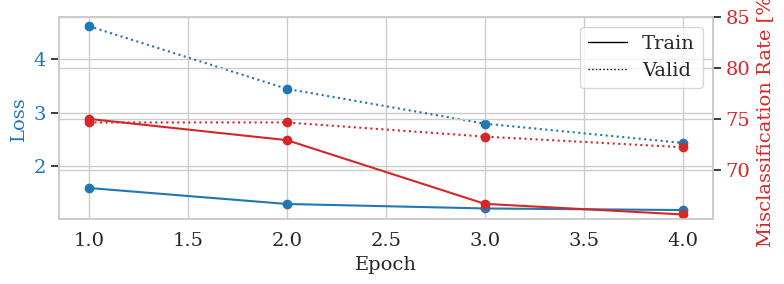

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

results_columns = ['train_loss', 'valid_loss', 'train_accuracy', 'valid_accuracy']
df = pd.DataFrame(clf.history[:, results_columns], columns = results_columns,
                  index = clf.history[:, 'epoch'])
df = df.assign(train_misclass = 100 - 100 * df.train_accuracy,
               valid_misclass = 100 - 100 * df.valid_accuracy)

fig, ax1 = plt.subplots(figsize = (8, 3))
df.loc[:, ['train_loss', 'valid_loss']].plot(
    ax = ax1, style = ['-', ':'], marker = 'o', color ='tab:blue', legend = False, fontsize = 14)
ax1.tick_params(axis = 'y', labelcolor = 'tab:blue', labelsize = 14)
ax1.set_ylabel("Loss", color = 'tab:blue', fontsize = 14)

ax2 = ax1.twinx()
df.loc[:, ['train_misclass', 'valid_misclass']].plot(
    ax = ax2, style = ['-', ':'], marker = 'o', color = 'tab:red', legend = False)

ax2.tick_params(axis = 'y', labelcolor = 'tab:red', labelsize = 14)
ax2.set_ylabel("Misclassification Rate [%]", color ='tab:red', fontsize = 14)
ax2.set_ylim(ax2.get_ylim()[0], 85)
ax1.set_xlabel("Epoch", fontsize = 14)

handlers = []
handlers.append(Line2D([0], [0], color ='black', linewidth = 1, linestyle = '-', label = 'Train'))
handlers.append(Line2D([0], [0], color = 'black', linewidth = 1, linestyle = ':', label = 'Valid'))
plt.legend(handlers, [h.get_label() for h in handlers], fontsize = 14)
plt.tight_layout()







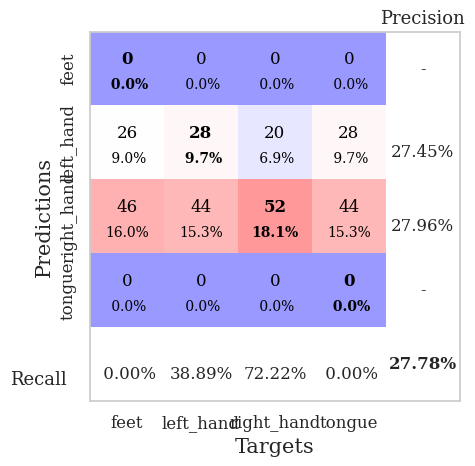

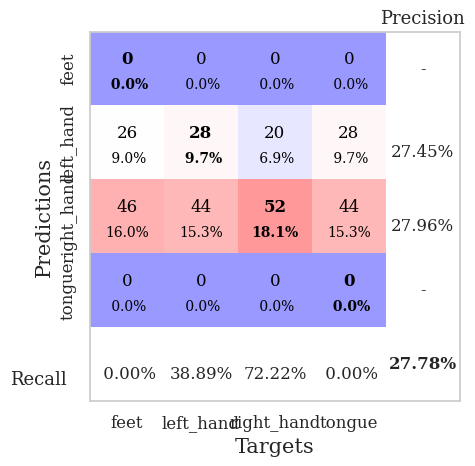

In [ ]:
from sklearn.metrics import confusion_matrix
from braindecode.visualization import plot_confusion_matrix

y_true = valid_set.get_metadata().target
y_pred = clf.predict(valid_set)

confusion_mat = confusion_matrix(y_true, y_pred)

label_dict = windows_dataset.datasets[0].window_kwargs[0][1]['mapping']

labels = [k for k, v in sorted(label_dict.items(), key = lambda kv: kv[1])]

plot_confusion_matrix(confusion_mat, class_names = labels)

